In [1]:
import numpy as np 
import pandas as pd
import matplotlib
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 
import warnings 

sns.set_style('darkgrid')
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', None)

In [2]:
''' reading dataset '''
df = pd.read_csv('tokyo_2020_tweets.csv')

In [3]:
''' displaying first 5 rows of data '''
df.head()

,id,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,hashtags,source,retweets,favorites,is_retweet
0,1418888645105356803,Abhishek Srivastav,"Udupi, India",Trying to be mediocre in many things,2021-02-01 06:33:51,45.0,39.0,293.0,False,2021-07-24 10:59:49,Let the party begin\n#Tokyo2020,['Tokyo2020'],Twitter for Android,0.0,0.0,False
1,1418888377680678918,Saikhom Mirabai Channu🇮🇳,"Manipur, India",Indian weightlifter 48 kg category. Champion🏆,2018-04-07 10:10:22,5235.0,5.0,2969.0,False,2021-07-24 10:58:45,Congratulations #Tokyo2020 https://t.co/8OFKMs...,['Tokyo2020'],Twitter for Android,0.0,0.0,False
2,1418888260886073345,Big Breaking,Global,All breaking news related to Financial Market....,2021-05-29 08:51:25,3646.0,3.0,5.0,False,2021-07-24 10:58:17,Big Breaking Now \n\nTokyo Olympic Update \n\n...,NaN,Twitter for Android,0.0,1.0,False
3,1418888172864299008,International Hockey Federation,Lausanne,Official International Hockey Federation Twitt...,2010-10-20 10:45:59,103975.0,2724.0,36554.0,True,2021-07-24 10:57:56,Q4: 🇬🇧3-1🇿🇦\n\nGreat Britain finally find a wa...,NaN,Twitter Web App,1.0,0.0,False
4,1418886894478270464,Cameron Hart,Australia,Football & Tennis Coach,2020-10-31 08:46:17,6.0,37.0,31.0,False,2021-07-24 10:52:51,All I can think of every time I watch the ring...,"['Tokyo2020', 'ArtisticGymnastics', '7Olympics...",Twitter for iPhone,0.0,0.0,False


In [4]:
''' shape of data '''
df.shape

(95594, 16)

In [5]:
''' checking null values '''
df.isnull().sum()

id                      0
user_name               1
user_location       22876
user_description     5371
user_created            9
user_followers          9
user_friends           10
user_favourites        10
user_verified          12
date                   10
text                   10
hashtags            21385
source                 11
retweets               14
favorites              14
is_retweet             14
dtype: int64

In [6]:
''' info of data '''
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 95594 entries, 0 to 95593
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   id                95594 non-null  object 
 1   user_name         95593 non-null  object 
 2   user_location     72718 non-null  object 
 3   user_description  90223 non-null  object 
 4   user_created      95585 non-null  object 
 5   user_followers    95585 non-null  object 
 6   user_friends      95584 non-null  object 
 7   user_favourites   95584 non-null  object 
 8   user_verified     95582 non-null  object 
 9   date              95584 non-null  object 
 10  text              95584 non-null  object 
 11  hashtags          74209 non-null  object 
 12  source            95583 non-null  object 
 13  retweets          95580 non-null  float64
 14  favorites         95580 non-null  float64
 15  is_retweet        95580 non-null  object 
dtypes: float64(2), object(14)
memory usage: 

In [7]:
''' preprocessing '''

''' converting date into date time column '''
df['datedt'] = pd.to_datetime(df['date'], errors='coerce')

''' retrieving year from datedt column '''
df['year'] = df['datedt'].dt.year

''' retrieving month from datedt column '''
df['month'] = df['datedt'].dt.month

''' retrieving day from datedt column '''
df['day'] = df['datedt'].dt.day

''' retrieving dayofweek from datedt column '''
df['dayofweek'] = df['datedt'].dt.dayofweek

''' retrieving hour from datedt column '''
df['hour'] = df['datedt'].dt.hour

''' retrieving minute from datedt column '''
df['minute'] = df['datedt'].dt.minute

''' retrieving dayofyear from datedt column '''
df['dayofyear'] = df['datedt'].dt.dayofyear

''' retrieving date from datedt column '''
df['date_only'] = df['datedt'].dt.date

In [8]:
df.head()

,id,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,hashtags,source,retweets,favorites,is_retweet,datedt,year,month,day,dayofweek,hour,minute,dayofyear,date_only
0,1418888645105356803,Abhishek Srivastav,"Udupi, India",Trying to be mediocre in many things,2021-02-01 06:33:51,45.0,39.0,293.0,False,2021-07-24 10:59:49,Let the party begin\n#Tokyo2020,['Tokyo2020'],Twitter for Android,0.0,0.0,False,2021-07-24 10:59:49,2021.0,7.0,24.0,5.0,10.0,59.0,205.0,2021-07-24
1,1418888377680678918,Saikhom Mirabai Channu🇮🇳,"Manipur, India",Indian weightlifter 48 kg category. Champion🏆,2018-04-07 10:10:22,5235.0,5.0,2969.0,False,2021-07-24 10:58:45,Congratulations #Tokyo2020 https://t.co/8OFKMs...,['Tokyo2020'],Twitter for Android,0.0,0.0,False,2021-07-24 10:58:45,2021.0,7.0,24.0,5.0,10.0,58.0,205.0,2021-07-24
2,1418888260886073345,Big Breaking,Global,All breaking news related to Financial Market....,2021-05-29 08:51:25,3646.0,3.0,5.0,False,2021-07-24 10:58:17,Big Breaking Now \n\nTokyo Olympic Update \n\n...,NaN,Twitter for Android,0.0,1.0,False,2021-07-24 10:58:17,2021.0,7.0,24.0,5.0,10.0,58.0,205.0,2021-07-24
3,1418888172864299008,International Hockey Federation,Lausanne,Official International Hockey Federation Twitt...,2010-10-20 10:45:59,103975.0,2724.0,36554.0,True,2021-07-24 10:57:56,Q4: 🇬🇧3-1🇿🇦\n\nGreat Britain finally find a wa...,NaN,Twitter Web App,1.0,0.0,False,2021-07-24 10:57:56,2021.0,7.0,24.0,5.0,10.0,57.0,205.0,2021-07-24
4,1418886894478270464,Cameron Hart,Australia,Football & Tennis Coach,2020-10-31 08:46:17,6.0,37.0,31.0,False,2021-07-24 10:52:51,All I can think of every time I watch the ring...,"['Tokyo2020', 'ArtisticGymnastics', '7Olympics...",Twitter for iPhone,0.0,0.0,False,2021-07-24 10:52:51,2021.0,7.0,24.0,5.0,10.0,52.0,205.0,2021-07-24


In [9]:
''' groupby ''' 
df_agg = df.groupby(["date_only"])["text"].count().reset_index()
df_agg.columns = ["date_only", "count"]

In [10]:
''' plotting funcion '''
def plot(df, x='date_only', y='count', hue=None, size=1, title="", is_log=False):
    f, ax = plt.subplots(1,1, figsize=(4*size,3*size))
    g = sns.lineplot(x=x, y=y, hue=hue, data=df)
    plt.xticks(rotation=90)
    if hue:
        plt.title('{} grouped by {} {}'.format(y, hue, title), fontsize=15)
    else:
        plt.title('{} | {}'.format(y, title), fontsize=15)
    if(is_log):
        ax.set(yscale="log")
    ax.grid(color='black', linestyle='dotted', linewidth=0.75);
    plt.xlabel('Date', fontsize=20);
    plt.ylabel('Count', fontsize=20);

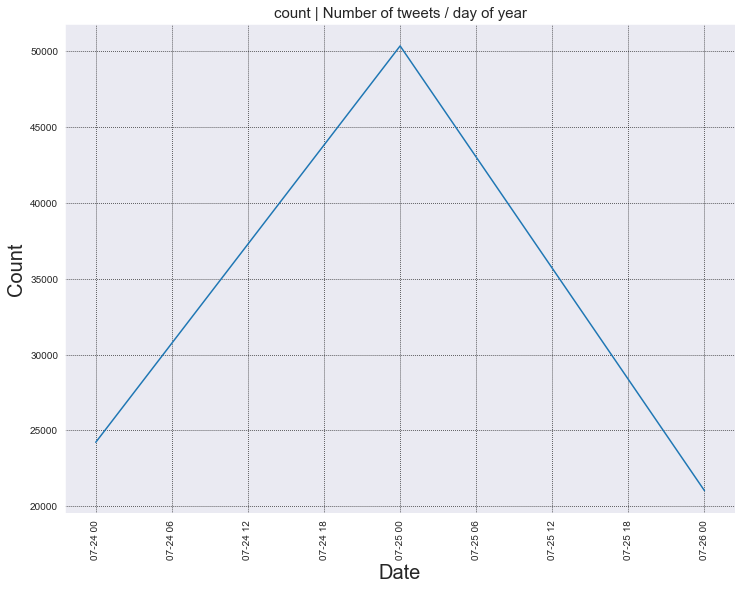

In [11]:
''' calling plot function '''
plot(df_agg, title="Number of tweets / day of year",size=3)

In [12]:
''' barplot '''
def bar_plot(feature, title, df, size=1, ordered=True):
    f, ax = plt.subplots(1,1, figsize=(4*size,4))
    total = float(len(df))
    if ordered:
        g = sns.countplot(df[feature], order = df[feature].value_counts().index[:20], palette='Set3')
    else:
        g = sns.countplot(df[feature], palette='Set3')
    g.set_title("Number and percentage of {}".format(title), fontsize=20)
    plt.xlabel('dayofweek', fontsize=15)
    plt.ylabel('count', fontsize=15)
    if(size > 2):
        plt.xticks(rotation=90, size=8)
    for p in ax.patches:
        height = p.get_height()
        ax.text(p.get_x()+p.get_width()/2.,
                height,
                '{:1.2f}%'.format(100*height/total),
                ha="center") 
    plt.show()    

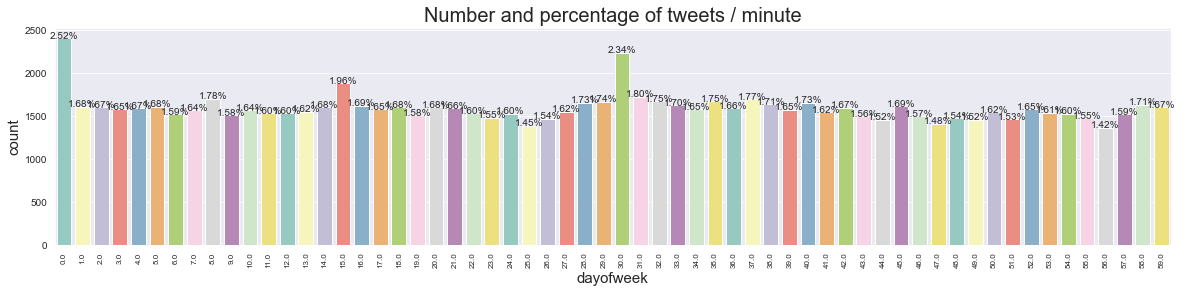

In [13]:
bar_plot("minute", "tweets / minute", df,size=5, ordered=False)

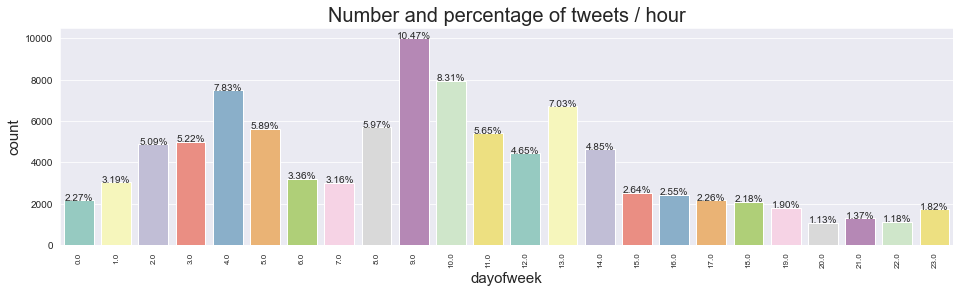

In [14]:
bar_plot("hour", "tweets / hour", df,size=4, ordered=False)

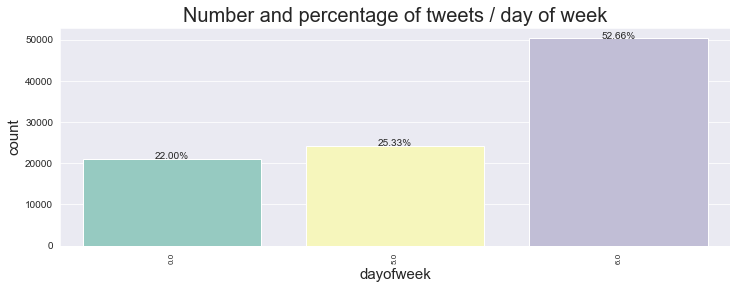

In [15]:
bar_plot("dayofweek", "tweets / day of week", df, size=3, ordered=False)

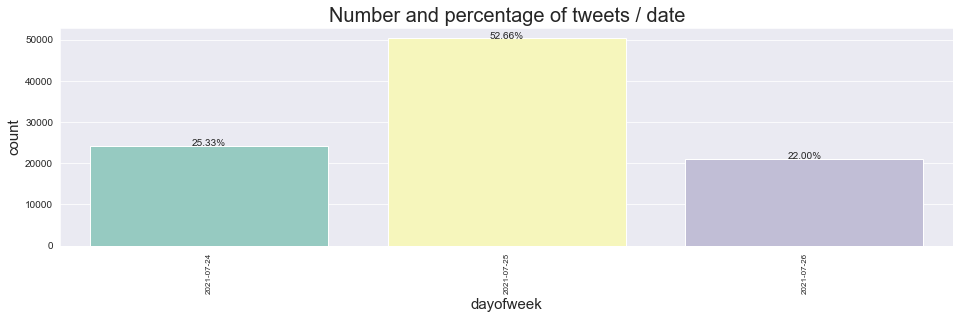

In [16]:
bar_plot("date_only", "tweets / date", df,size=4, ordered=False)